In [1]:
import sys
import os


sys.path.append("../src")

In [2]:
from process_SHAC import load_process_SHAC

# Load

In [3]:
base_dir = "/edata/xiruod/SocialDeterminants_SHAC_n2c2_2022/n2c2_sdoh_challenge"

In [4]:
df = load_process_SHAC(base_dir=base_dir, replaceNA="all")

In [5]:
df

,id,Drug,Alcohol,Tobacco,SubstanceAgg,set,location,text
0,3407,True,False,False,True,train,uw,Social History: Work: Unemployed Lives with m...
1,3313,False,True,False,True,train,uw,SOCIAL HISTORY: Living situation: Comfortabl...
2,3045,True,False,True,True,train,uw,HABITS: Tobacco Use: Approximately 20 pack-ye...
3,4399,False,True,True,True,train,uw,Social History: Immigrated from [LOCATION] in ...
4,3637,False,False,True,True,train,uw,HABITS: Tobacco Use: Formerly smoked 1-2 ciga...
...,...,...,...,...,...,...,...,...
4400,2884,True,True,False,True,test,mimic,Social History: lives w/ mother in [**Name2 (N...
4401,2728,False,False,True,True,test,mimic,Social History: lives with wife (recent nursin...
4402,2854,False,True,True,True,test,mimic,"Social History: quit smoking several yrs ago, ..."
4403,2726,False,False,False,False,test,mimic,"Social History: Denies Tob, EtOH, or Illicit d..."


# Process Text

In [13]:
import spacy
import spacy_cleaner
from spacy_cleaner.processing import removers, mutators


model = spacy.load("en_core_web_sm")

pipeline = spacy_cleaner.Pipeline(
    model,
    # removers.remove_stopword_token,
    removers.remove_punctuation_token,
    mutators.mutate_lemma_token,
)


In [14]:
texts = df['text'].str.lower()

In [15]:
df['process_text'] = pipeline.clean(texts)

Cleaning Progress: 100%|██████████| 4405/4405 [00:16<00:00, 261.90it/s]


In [16]:
df['process_text'].iloc[0]

'social history work unemployed life with mother endorse aerosol can huff marijuana no other substance'

# Word Cloud

In [48]:
from wordcloud import WordCloud

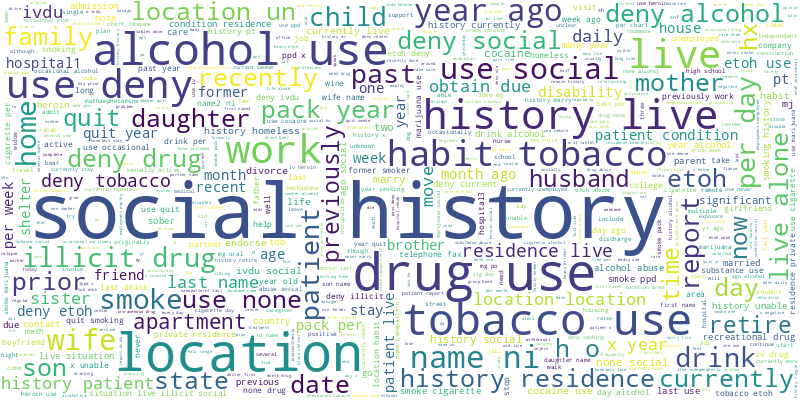

In [50]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=800, height=400)


wordcloud.generate(" ".join(df['process_text']))
# Visualize the word cloud
wordcloud.to_image()

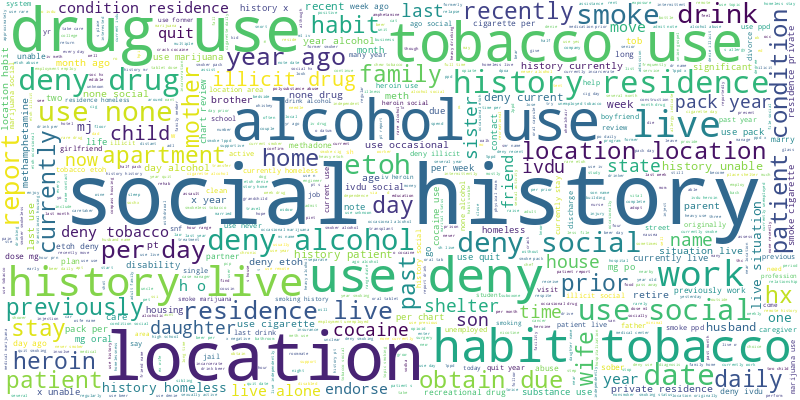

In [51]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=800, height=400)


wordcloud.generate(" ".join(df.query("location=='uw'")['process_text']))
# Visualize the word cloud
wordcloud.to_image()

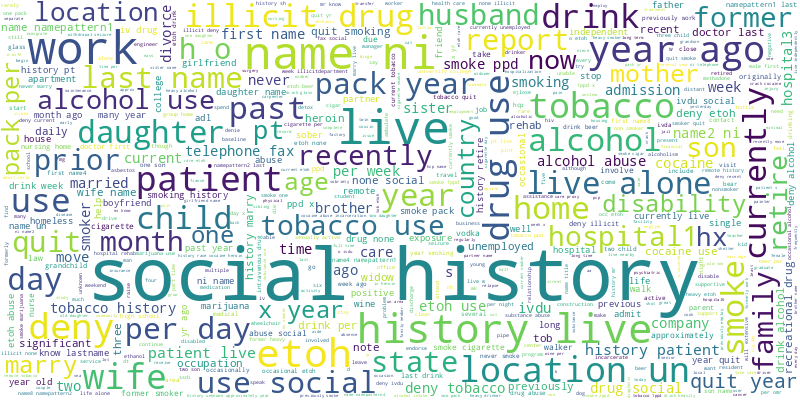

In [52]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=800, height=400)


wordcloud.generate(" ".join(df.query("location=='mimic'")['process_text']))
# Visualize the word cloud
wordcloud.to_image()

# LDA

In [51]:
import gensim

In [22]:
from gensim.models import LdaMulticore

In [42]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))



In [63]:

data_words = list(sent_to_words(df.query("(location=='uw') & (Drug==True)")["process_text"]))

common_dictionary = gensim.corpora.Dictionary(data_words)

common_corpus = [common_dictionary.doc2bow(text) for text in data_words]

lda_model = gensim.models.LdaMulticore(common_corpus, num_topics = 3, id2word = common_dictionary,
                                       passes = 10,
                                       workers = 10)

for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.026*"mg" + 0.018*"negative" + 0.016*"of" + 0.013*"for" + 0.013*"po" + 0.012*"and" + 0.011*"in" + 0.010*"date" + 0.009*"hour" + 0.009*"system"


Topic: 1 
Words: 0.031*"in" + 0.031*"be" + 0.025*"and" + 0.021*"have" + 0.020*"he" + 0.019*"history" + 0.018*"location" + 0.018*"she" + 0.018*"to" + 0.017*"with"


Topic: 2 
Words: 0.075*"use" + 0.037*"history" + 0.030*"social" + 0.025*"in" + 0.022*"alcohol" + 0.021*"drug" + 0.021*"tobacco" + 0.018*"live" + 0.018*"location" + 0.017*"deny"




In [64]:

data_words = list(sent_to_words(df.query("(location=='uw') & (Drug==False)")["process_text"]))

common_dictionary = gensim.corpora.Dictionary(data_words)

common_corpus = [common_dictionary.doc2bow(text) for text in data_words]

lda_model = gensim.models.LdaMulticore(common_corpus, num_topics=3, id2word = common_dictionary,
                                       passes = 10,
                                       workers = 10)

for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.042*"in" + 0.038*"location" + 0.023*"etoh" + 0.020*"with" + 0.018*"live" + 0.018*"history" + 0.017*"social" + 0.016*"and" + 0.013*"no" + 0.013*"deny"


Topic: 1 
Words: 0.041*"to" + 0.026*"be" + 0.024*"location" + 0.023*"in" + 0.022*"and" + 0.019*"history" + 0.017*"social" + 0.015*"have" + 0.014*"with" + 0.014*"patient"


Topic: 2 
Words: 0.075*"use" + 0.045*"history" + 0.043*"social" + 0.042*"deny" + 0.034*"drug" + 0.032*"live" + 0.032*"in" + 0.030*"tobacco" + 0.030*"alcohol" + 0.030*"location"




In [65]:

data_words = list(sent_to_words(df.query("(location=='mimic') & (Drug==True)")["process_text"]))

common_dictionary = gensim.corpora.Dictionary(data_words)

common_corpus = [common_dictionary.doc2bow(text) for text in data_words]

lda_model = gensim.models.LdaMulticore(common_corpus, num_topics = 3, id2word = common_dictionary,
                                       passes = 10,
                                       workers = 10)

for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.035*"history" + 0.028*"of" + 0.027*"use" + 0.023*"and" + 0.020*"social" + 0.019*"have" + 0.017*"be" + 0.016*"in" + 0.016*"with" + 0.013*"name"


Topic: 1 
Words: 0.031*"in" + 0.027*"history" + 0.026*"be" + 0.023*"and" + 0.022*"social" + 0.022*"use" + 0.020*"have" + 0.019*"year" + 0.017*"live" + 0.017*"with"


Topic: 2 
Words: 0.057*"he" + 0.026*"be" + 0.023*"in" + 0.022*"have" + 0.022*"the" + 0.020*"and" + 0.018*"his" + 0.017*"of" + 0.016*"history" + 0.016*"use"




In [66]:

data_words = list(sent_to_words(df.query("(location=='mimic') & (Drug==False)")["process_text"]))

common_dictionary = gensim.corpora.Dictionary(data_words)

common_corpus = [common_dictionary.doc2bow(text) for text in data_words]

lda_model = gensim.models.LdaMulticore(common_corpus, num_topics = 3, id2word = common_dictionary,
                                       passes = 10,
                                       workers = 10)

for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.043*"be" + 0.031*"he" + 0.027*"and" + 0.027*"history" + 0.025*"have" + 0.024*"in" + 0.023*"the" + 0.021*"she" + 0.020*"social" + 0.019*"to"


Topic: 1 
Words: 0.031*"history" + 0.029*"she" + 0.029*"social" + 0.023*"no" + 0.022*"with" + 0.019*"live" + 0.015*"in" + 0.014*"her" + 0.014*"of" + 0.013*"use"


Topic: 2 
Words: 0.055*"history" + 0.048*"social" + 0.033*"live" + 0.026*"with" + 0.025*"in" + 0.023*"etoh" + 0.021*"tobacco" + 0.021*"no" + 0.020*"year" + 0.019*"name"


